## sentiment analysis for the stock market data

In [2]:
import re
import nltk
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [7]:
df = pd.read_csv(r"C:\Users\hp\Downloads\week 1 data\Data-20240826T133225Z-001\Data\raw_analyst_ratings.csv\raw_analyst_ratings.csv")
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


True

data cleaning and preparing 

In [11]:
df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [32]:
df.shape

(1407328, 6)

In [38]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['headline_length'] = df['headline'].apply(len)
time_data = df['date'].apply(lambda x: pd.notna(x) and isinstance(x, pd.Timestamp) and x.time() != pd.Timestamp.min.time())
print(time_data.sum())

1351341


In [40]:
senti_data = df.copy()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [57]:
senti_data['sentiment'] = senti_data['headline'].apply(lambda x: sia.polarity_scores(text=x)['compound'])
senti_data['sentiment_category'] = pd.cut(senti_data['sentiment'], bins=[-1, -0.5, -0.0001, 0.5, 1], labels=['Very Negative', 'Negative', 'Neutral', 'Positive'])
senti_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,sentiment,sentiment_category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,NaT,A,39,0.000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,NaT,A,42,0.000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,NaT,A,29,0.000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,NaT,A,44,0.000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,NaT,A,87,0.296,Neutral


In [66]:
senti_data['sentiment_category'].value_counts()


sentiment_category
Neutral          1070915
Negative          182864
Positive          109718
Very Negative      43831
Name: count, dtype: int64

## sentiment for the stock company

In [74]:
apple = senti_data[senti_data['stock'] == 'AAPL']
apple.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,sentiment,sentiment_category
6680,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,NaT,AAPL,69,0.5574,Positive
6681,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,NaT,AAPL,45,0.0000,Neutral
6682,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,NaT,AAPL,87,0.2023,Neutral
6683,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,NaT,AAPL,65,0.0000,Neutral
6684,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,NaT,AAPL,87,0.3818,Neutral


In [76]:
apple_count = apple['sentiment_category'].value_counts()


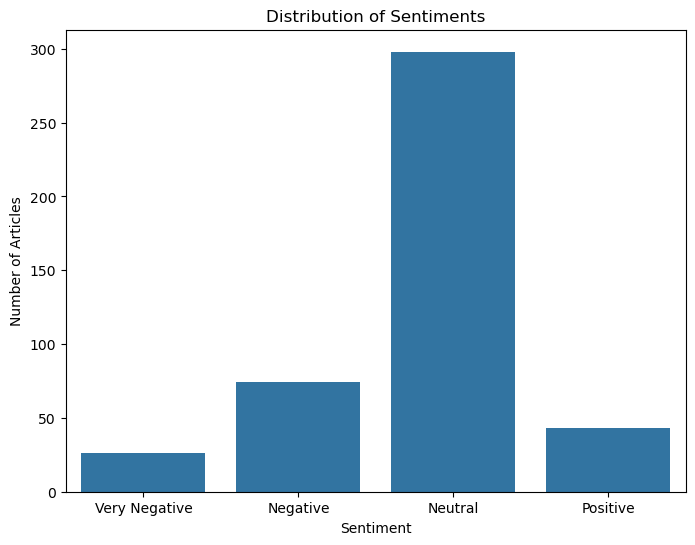

In [78]:
def visualizing (stock):
    plt.figure(figsize=(8, 6))
    sns.barplot(x= stock.index, y=stock.values)
    plt.title('Distribution of Sentiments')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Articles')
    plt.show()

visualizing(apple_count)

## for amazon

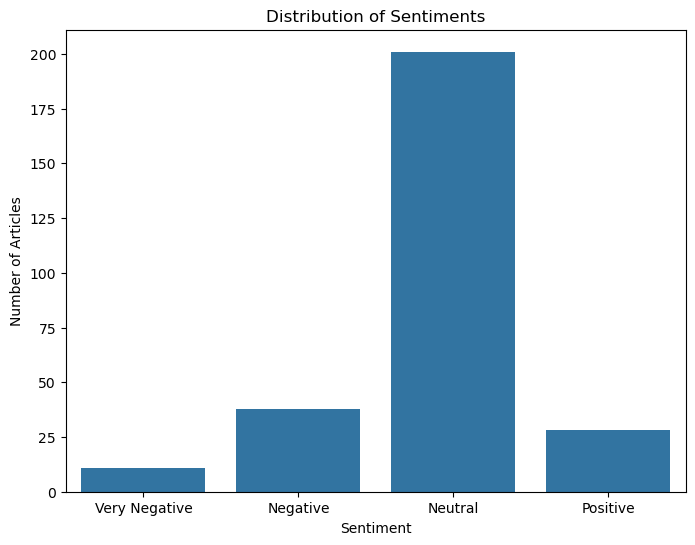

In [87]:
AMZN = senti_data[senti_data['stock'] == 'AMZN']
AMZN
AMZN_COUNT = AMZN['sentiment_category'].value_counts()
AMZN_COUNT 
visualizing(AMZN_COUNT)

##for google

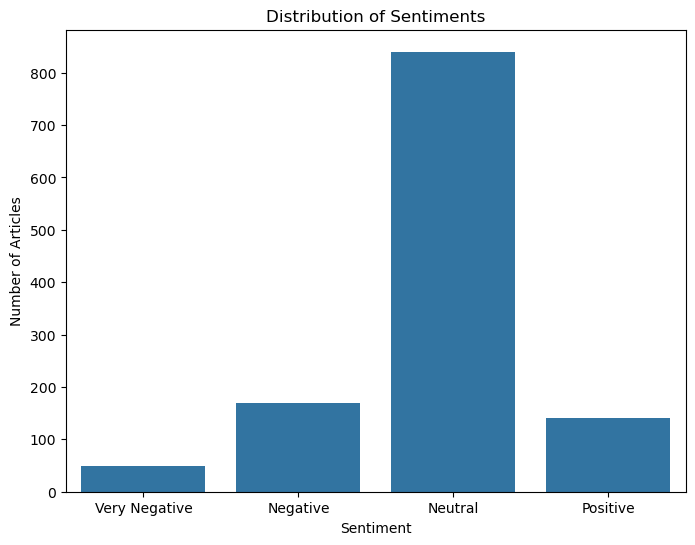

In [93]:
GOOG = senti_data[senti_data['stock'] == 'GOOG']
GOOG
GOOG_COUNT = GOOG['sentiment_category'].value_counts()
GOOG_COUNT 
visualizing(GOOG_COUNT)

##for MFST

Empty DataFrame
Columns: [Unnamed: 0, headline, url, publisher, date, stock, headline_length, sentiment, sentiment_category]
Index: []
sentiment_category
Very Negative    0
Negative         0
Neutral          0
Positive         0
Name: count, dtype: int64


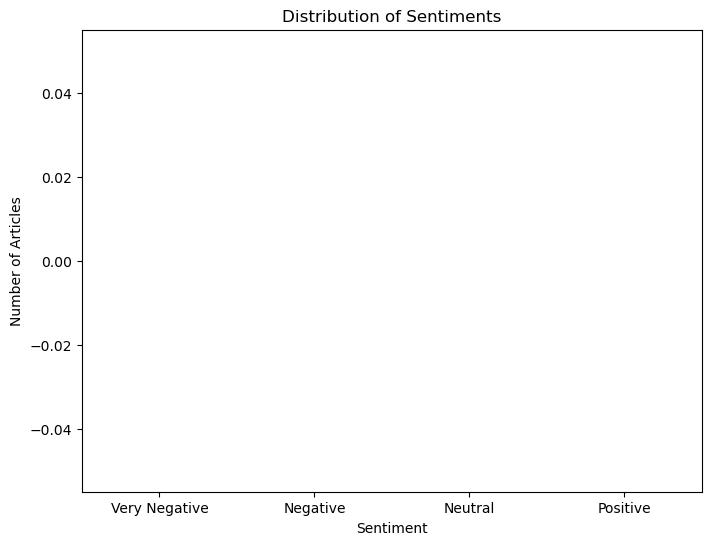

In [97]:
MSFT = senti_data[senti_data['stock'] == 'MSFT']
print(MSFT)
MSFT_COUNT = MSFT['sentiment_category'].value_counts()
print(MSFT_COUNT)
visualizing(MSFT_COUNT)

##FOR NVDA

sentiment_category
Neutral          2393
Negative          369
Positive          281
Very Negative     103
Name: count, dtype: int64


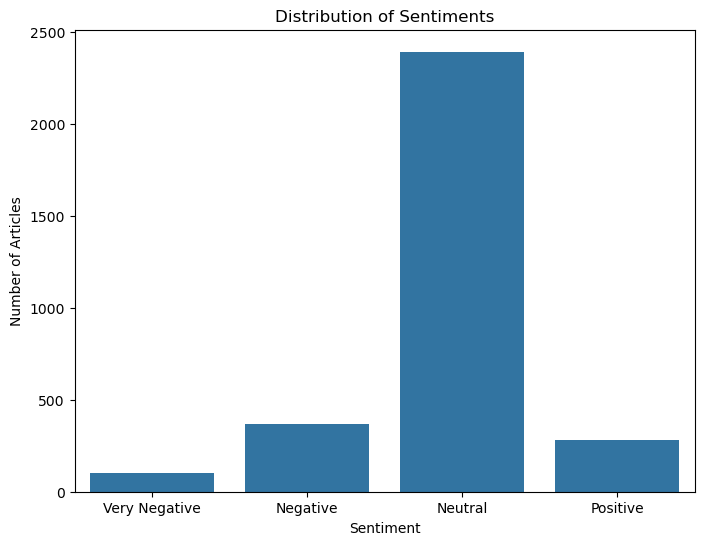

In [101]:
NVDA = senti_data[senti_data['stock'] == 'NVDA']
NVDA
NVDA_COUNT = NVDA['sentiment_category'].value_counts()
print(NVDA_COUNT) 
visualizing(NVDA_COUNT)

##FOR META 

In [105]:
META = senti_data[senti_data['stock'] == 'META']
print(META)
META_COUNT = META['sentiment_category'].value_counts()
print(META_COUNT) 
#visualizing(META_COUNT)

Empty DataFrame
Columns: [Unnamed: 0, headline, url, publisher, date, stock, headline_length, sentiment, sentiment_category]
Index: []
sentiment_category
Very Negative    0
Negative         0
Neutral          0
Positive         0
Name: count, dtype: int64
